# Task №2:

1) Develop by yourself using numpy library (for a functions of two variables f(x,y)): 

    a) a function to implement gradient descent (GD) algorithm;
    b) Adam's optimization algorithm.

2) Come up with a function of two variables of an arbitrary form and implement the search for its minimum using functions implemented in p.1

3) Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

----


In [1]:
#Importing neccesary libraries:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar

# 1.A Gradient descent algorithm:

In [14]:
def gradient_num(func, args, eps = 1e-4):
    
    '''gradient_num calculates gradient of the function f(x,y) numerically'''
        
    a_arg, b_arg = args[0], args[1]
    
    part_deriv_a = (func([a_arg + eps, b_arg]) - func([a_arg - eps, b_arg])) / (2 * eps)
    part_deriv_b = (func([a_arg, b_arg + eps]) - func([a_arg, b_arg - eps])) / (2 * eps)

    return np.array([part_deriv_a,  part_deriv_b])


def gradient_descent(func, x0 = [-5, 5], eps = 1e-5, alpha = 0.05):

    '''classical gradient descent algorithmfor a function of two wariables f(x, y)'''
    
    func_eval_num, iter_num = 0, 0
    args_prev = np.array(x0)
    grad_func_prev = gradient_num(func, args_prev)

    res = minimize_scalar(lambda x: func(args_prev - x * grad_func_prev))
    args_curr = args_prev - np.dot(grad_func_prev, res.x)
    grad_func_curr = gradient_num(func, args_curr)
    
    func_eval_num += res.nfev + 8
    iter_num += 1
    
    while np.linalg.norm(args_curr - args_prev, np.inf) >= eps:
        
        # It is also possible to use the Barzilai–Borwein coefficient, which calculates as follows:

        #alpha = np.dot(args_curr - args_prev, grad_func_curr - grad_func_prev) \
        #/ np.square(np.linalg.norm(grad_func_curr - grad_func_prev))
        
        args_prev = args_curr
        grad_func_prev = grad_func_curr
        
        args_curr = args_prev - np.dot(grad_func_prev, alpha)
        grad_func_curr = gradient_num(func, args_curr)
        
        func_eval_num += 4
        iter_num += 1
    
    n_digits = abs(int(round(np.log10(eps))))

    return np.array([round(args_curr[0], n_digits), round(args_curr[1], n_digits), func_eval_num, iter_num])


# TESTING ---------------------------------------------------------------------------------------
x, y, nfev, nit = gradient_descent(lambda arg: np.sqrt(arg[0] ** 2 + arg[1] ** 2))

print('minimum reaches at the point: ', [x, y])
print('number of iterations: {}, number of function evaluations: {}'.format(nit, nfev))

minimum reaches at the point:  [-1e-05, 1e-05]
number of iterations: 2.0, number of function evaluations: 43.0


# 1.B ADAM's optimization algorithm:

In [15]:
def adam_gradient_descent(func, x0 = [-5, 5], eps = 1e-5, alpha = 0.05, beta_1 = 0.8, beta_2 = 0.999):

    '''classical gradient descent algorithmfor a function of two wariables f(x, y)'''
    
    func_eval_num, iter_num = 0, 0
    args_prev = np.array(x0)
    grad_func_prev = gradient_num(func, args_prev)

    res = minimize_scalar(lambda x: func(args_prev - x * grad_func_prev))
    args_curr = args_prev - np.dot(grad_func_prev, res.x)
    grad_func_curr = gradient_num(func, args_curr)
    
    func_eval_num += res.nfev + 8
    iter_num += 1
    
    m, v = np.zeros(2), np.zeros(2)
    
    while np.linalg.norm(args_curr - args_prev, np.inf) >= eps:
        
        args_prev = args_curr
        grad_func_prev = grad_func_curr
        
        m = beta_1 * m + (1. - beta_1) * grad_func_prev
        v = beta_2 * v + (1. - beta_2) * pow(grad_func_prev, 2)

        m_hat = m / (1 - pow(beta_1, iter_num))
        v_hat = v / (1 - pow(beta_2, iter_num))
    
        new_coef = np.dot(alpha / (np.sqrt(v_hat) - eps), m_hat)
        
        args_curr = args_prev - np.dot(grad_func_prev, new_coef)
        grad_func_curr = gradient_num(func, args_curr)
        
        func_eval_num += 4
        iter_num += 1
        
    
    n_digits = abs(int(round(np.log10(eps))))

    return np.array([round(args_curr[0], n_digits), round(args_curr[1], n_digits), func_eval_num, iter_num])


# TESTING ---------------------------------------------------------------------------------------
x, y, nfev, nit = adam_gradient_descent(lambda arg: np.sqrt(arg[0] ** 2 + arg[1] ** 2))
print("minimum by the ADAM's optimization method: ", [x, y])
print('number of iterations: {}, number of function evaluations: {}\n'.format(nit, nfev))

minimum by the ADAM's optimization method:  [0.0, -0.0]
number of iterations: 2.0, number of function evaluations: 43.0



# 2. Inventing a function of two variables and mplementing the search of it's minimum:

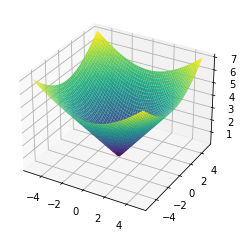

for calculations with eps = 10^-5

minimum by the scipy.optimize.minimize:  [-0.0, -0.0]
number of iterations: 8, number of function evaluations: 540

minimum by the gradient descent method:  [-1e-05, 1e-05]
number of iterations: 2.0, number of function evaluations: 43.0

minimum by the ADAM's optimization method:  [0.0, -0.0]
number of iterations: 2.0, number of function evaluations: 43.0



In [19]:
# Invented function:

def test_func(arg):
    return np.sqrt(arg[0] ** 2 + arg[1] ** 2)

def grad_test_func(arg):
    return np.array([arg[0] / np.sqrt(arg[0] ** 2 + arg[1] ** 2), arg[1] / np.sqrt(arg[0] ** 2 + arg[1] ** 2)])


# Visualization of the invented function:
x, y = np.linspace(-5, 5), np.linspace(-5, 5)
X, Y = np.meshgrid(x, y) 
Z = test_func([X, Y]) 
  
ax = plt.axes(projection = '3d') 
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis')
plt.show()

# Here is the value of epsilon:
lg_eps = 5
print('for calculations with eps = 10^-{}\n'.format(lg_eps))


# Finding the minimum with built-in python tools (I gess it's a QuasiNewtonic method, like BFGS)
res = minimize(test_func, x0 = [-5, 5], options = {'gtol': 10 ** (-lg_eps)})
print('minimum by the scipy.optimize.minimize: ', [round(coord, lg_eps) for coord in res.x])
print('number of iterations: {}, number of function evaluations: {}\n'.format(res.nit, res.nfev))


# Finding the minimum with gradient descent method:
x, y, nfev, nit = gradient_descent(test_func, x0 = [-5, 5], eps = 10 ** (-lg_eps))
print('minimum by the gradient descent method: ', [x, y])
print('number of iterations: {}, number of function evaluations: {}\n'.format(nit, nfev))


# Finding the minimum with ADAM's optimization method:
x, y, nfev, nit = adam_gradient_descent(test_func, x0 = [-5, 5], eps = 10 ** (-lg_eps))
print("minimum by the ADAM's optimization method: ", [x, y])
print('number of iterations: {}, number of function evaluations: {}\n'.format(nit, nfev))

# 3. Illustration of the process of finding an extremum: